Questo programma ha l'obiettivo di verificare l'efficienza di un cartellone pubblicitario.
Inserire tramite il menu di selezione, su quale zona deve concentrarsi l'attenzione degli utenti: 


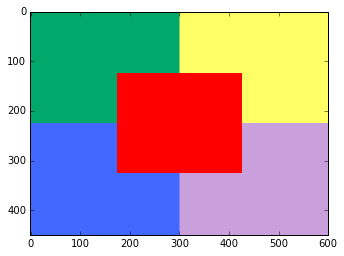

Inserisci il numero di utenti che si vuole osservare:
3
Inserisci numero di fotogrammi (per ogni utente):
20
Immagine di taratura:


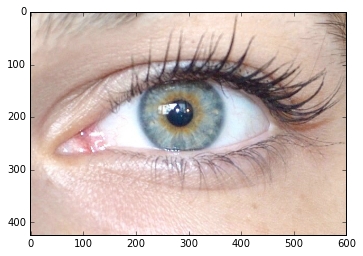

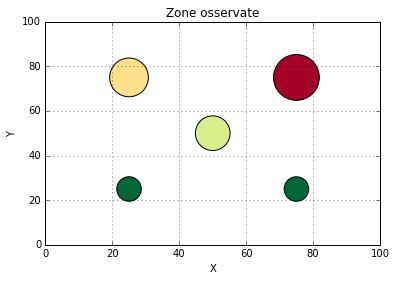

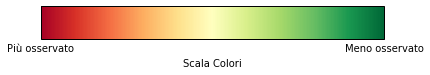

Immagine di taratura:


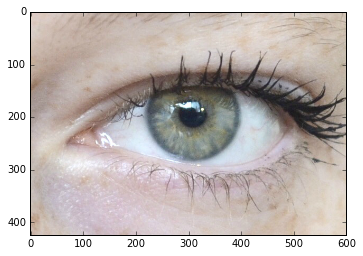

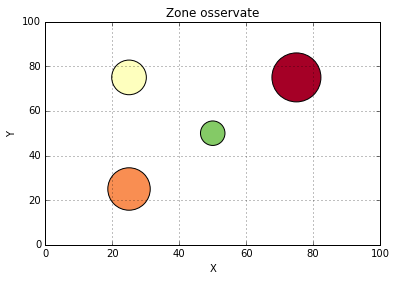

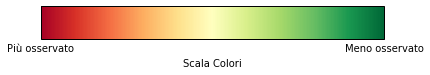

Immagine di taratura:


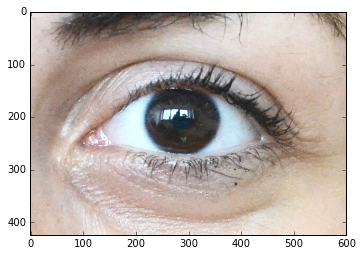

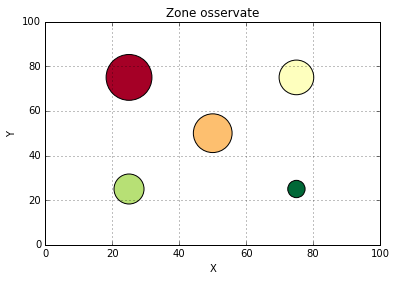

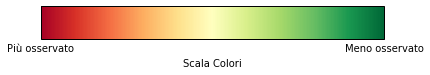

ANALISI COMPLESSIVA:
osservazione di più persone


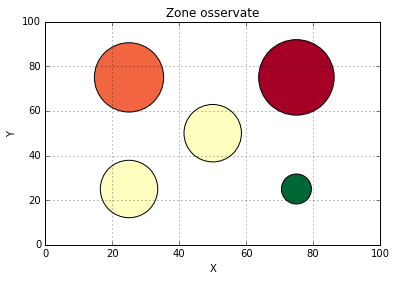

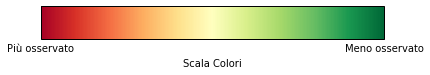

La pubblicità è efficiente. Gli osservatori si concentrano maggiormente sull'area selezionata!


In [1]:
%matplotlib inline
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mplimg
from IPython import display
from ipywidgets import widgets

def conta_punti(img,count,soglia):
    global y_centro, x_centro,xL,xH,yL,yH
    for y in range(yL,yH):
        for x in range(xL,xH):
            if img[y,x]>soglia:
                if y<y_centro:
                    count[0] +=1
                else:
                    count[1] +=1 
    for y in range(yL,yH):
        for x in range(xL,xH):
            if img[y,x]>soglia:
                if x<x_centro:
                    count[2] +=1
                else:
                    count[3] +=1            
    return count  

def assegnamento(count,COUNT_tar):
    
    if ((count[0] > (COUNT_tar[0]-800)) and (count[0] < (COUNT_tar[0]+800)) and 
        (count[1] > (COUNT_tar[1]-800)) and (count[1] < (COUNT_tar[1]+800)) and 
        (count[2] > (COUNT_tar[2]-800)) and (count[2] < (COUNT_tar[2]+800)) and
        (count[3] > (COUNT_tar[3]-800)) and (count[3] < (COUNT_tar[3]+800))):
        x=50
        y=50
    elif (count[0] > count[1]) and (count[2]>count[3]):
        y=25
        x=25
    elif (count[0] > count[1]) and (count[2]<count[3]):
        y=25
        x=75
    elif (count[0] < count[1]) and (count[2]>count[3]):
        y=75
        x=25
    else:
        y=75
        x=75
    return(x,y)     

def conta_posix(lista,count):
    for i in range(N):
            if lista[i][0]== 50 and lista[i][1] ==50:
                count[0] +=1
            elif lista[i][0]== 25 and lista[i][1] ==25:
                count[1] +=1
            elif lista[i][0]== 25 and lista[i][1] ==75:
                count[2]+=1
            elif lista[i][0]== 75 and lista[i][1] ==25:
                count[3]+=1
            else: 
                count[4]+=1

def colori_area(POSIX,colori,area):
    min_POSIX=min(POSIX)
    POSIX_tmp=[]
    for i in range(len(POSIX)):
        POSIX_tmp.append(POSIX[i]-min_POSIX)
    max_POSIX_tmp=max(POSIX_tmp)
    if (max_POSIX_tmp)==0:
        for i in range(len(POSIX_tmp)):
            colori.append(1)
    else:
        for i in range(len(POSIX_tmp)):
            colori.append(1-(POSIX_tmp[i]/max_POSIX_tmp))

    for i in range (len(POSIX)):
        area.append(POSIX[i]*300)                

def crea_grafico(colori,area):
    global cmap, cmap_colorbar
    colors = [cmap(i) for i in colori]       
    plt.scatter(X_VAL, Y_VAL, s=area, c=colors)
    plt.axis([0,100,0,100])
    plt.grid(True)
    plt.title("Zone osservate")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

    fig=plt.figure(figsize=(5.3,3))
    ax1=fig.add_axes([0.05,0.80,0.9,0.15])
    cbl=mpl.colorbar.ColorbarBase(ax1, cmap=cmap_colorbar, orientation='horizontal',ticks=[0,1])
    cbl.set_label('Scala Colori')
    cbl.ax.set_xticklabels(['Più osservato','Meno osservato'])
    plt.show()

def taratura_soglia(img_tar, count):
    for y in range(yL):
        for x in range(xH):
            if img_tar[y,x]>180:
                count[0]+=1
    for y in range(yH,Col):
        for x in range(xH):
            if img_tar[y,x]>180:
                count[1]+=1
    for y in range(yL,yH):
        for x in range(xL):
            if img_tar[y,x]>180:
                count[2]+=1              
    return count[0]+count[1]+count[2]

def somma_contatori(counter):
    global CONTATORI
    for j in range(5):
        for i in range(M):
            CONTATORI[j]= CONTATORI[j]+counter[i][j]
            
def on_change(change):
    global area_occhi
    if((change['new'])=='Red') and area_occhi==0:
        print("La pubblicità è efficiente. Gli osservatori si concentrano maggiormente sull'area selezionata!")
    elif((change['new'])=='Blue') and area_occhi==1:
        print("La pubblicità è efficiente. Gli osservatori si concentrano maggiormente sull'area selezionata!")
    elif((change['new'])=='Green') and area_occhi==2:
        print("La pubblicità è efficiente. Gli osservatori si concentrano maggiormente sull'area selezionata!")
    elif((change['new'])=='Violet') and area_occhi==3:
        print("La pubblicità è efficiente. Gli osservatori si concentrano maggiormente sull'area selezionata!")
    elif((change['new'])=='Yellow') and area_occhi==4:
        print("La pubblicità è efficiente. Gli osservatori si concentrano maggiormente sull'area selezionata!")
    else:
        print("La pubblicità non è efficiente.")

#scelta della pubblicità
pubbli =mplimg.imread('pubbli.jpg')

print("Questo programma ha l'obiettivo di verificare l'efficienza di un cartellone pubblicitario.")
print("Inserire tramite il menu di selezione, su quale zona deve concentrarsi l'attenzione degli utenti: ")

sel=widgets.ToggleButtons(options=["Red", "Blue", "Green", "Violet", "Yellow"])
display.display(sel)

for y in range(225,450):
        for x in range(300):
            pubbli[y,x]=(65,105,255)

for y in range(225):
    for x in range(300):
        pubbli[y,x]=(0,168,107)
            

for y in range(225,450):
        for x in range(300,600):
            pubbli[y,x]=(201,160,220)
            
            
for y in range(225):
        for x in range(300,600):
            pubbli[y,x]=(255,255,102)


for y in range(125,325):
        for x in range(175,425):
            pubbli[y,x]=(255,0,0)
            

pubbliplot=plt.imshow(pubbli)
plt.show()  

print("Inserisci il numero di utenti che si vuole osservare:")
M=int(input())
print("Inserisci numero di fotogrammi (per ogni utente):")
N=int(input())

IMMAGINI_UTENTI=[]
for i in range(M):
    IMMAGINI_UTENTI.append([])

for i in range(N):
    IMMAGINI_UTENTI[0].append(cv2.imread('imgc%s.jpg'%i,0))

for i in range(N):
    IMMAGINI_UTENTI[1].append(cv2.imread('imgb%s.jpg'%i,0))

for i in range(N):
    IMMAGINI_UTENTI[2].append(cv2.imread('imga%s.jpg'%i,0))

IMMAGINI_TARATURA=[]
IMMAGINI_TARATURA.append(cv2.imread('imgc0.jpg',0))
IMMAGINI_TARATURA.append(cv2.imread('imgb0.jpg',0))
IMMAGINI_TARATURA.append(cv2.imread('imga0.jpg',0))

Row=IMMAGINI_TARATURA[0].shape[1]
Col=IMMAGINI_TARATURA[0].shape[0]
x_centro=int(Row/2)
y_centro=int(Col/2)
yL=int(0.25*Col)
yH=int(0.7*Col)
xL=int(Row/6)
xH=Row

#taratura valore bianco
count_soglia=[]

for i in range(M):
    count_soglia.append([0]*4)
area_int=(yH-yL)*(xH-xL)
pixels_ext=(Row*Col)-(area_int)

val_soglia=[]
soglia=[]

for i in range(M):
    val_soglia.append([])
    val_soglia[i]=taratura_soglia(IMMAGINI_TARATURA[i],count_soglia[i])
    if val_soglia[i]>(pixels_ext*0.7):
        soglia.append(200)
    else:
        soglia.append(180)
#fine taratura valore bianco

#taratura soglie centro
COUNT_tar_UTENTI=[0]*M

for i in range(M):
    COUNT_tar_UTENTI[i]=[0]*4
    COUNT_tar_UTENTI[i]=conta_punti(IMMAGINI_TARATURA[i],COUNT_tar_UTENTI[i],soglia[i])


#fine taratura soglie centro

COUNT_UTENTI=[]
for i in range(M):
    COUNT_UTENTI.append([])
for i in range(len(COUNT_UTENTI)):
    for j in range(N):
        COUNT_UTENTI[i].append([0]*4)

for i in range(len(COUNT_UTENTI)):
    for j in range(N):
        COUNT_UTENTI[i][j]=conta_punti(IMMAGINI_UTENTI[i][j],COUNT_UTENTI[i][j],soglia[i])

punti_utenti=[]
for i in range(M):
    punti_utenti.append([])

for i in range(M):
    for j in range(N):
        punti_utenti[i].append(assegnamento(COUNT_UTENTI[i][j], COUNT_tar_UTENTI[i]))


X_VAL=[50,25,25,75,75]
Y_VAL=[50,25,75,25,75]

POSIX_UTENTI=[]
for i in range(M):
    POSIX_UTENTI.append([0]*5)
for i in range(M):
    conta_posix(punti_utenti[i],POSIX_UTENTI[i])

colori_UTENTI=[]
for i in range(M):
    colori_UTENTI.append([])

area_UTENTI=[]
for i in range(M):
    area_UTENTI.append([])

for i in range(M):
    colori_area(POSIX_UTENTI[i],colori_UTENTI[i],area_UTENTI[i])

cmap = plt.get_cmap('RdYlGn')
cmap_colorbar=mpl.cm.RdYlGn

IMMAGINI_GRAFICO=[]
IMMAGINI_GRAFICO.append(mplimg.imread('imgc0.jpg'))
IMMAGINI_GRAFICO.append(mplimg.imread('imgb0.jpg'))
IMMAGINI_GRAFICO.append(mplimg.imread('imga0.jpg'))

for i in range(M):
    print("Immagine di taratura:")
    imgplot = plt.imshow(IMMAGINI_GRAFICO[i])
    plt.show()
    crea_grafico(colori_UTENTI[i],area_UTENTI[i])

    
CONTATORI=[0]*5        
COLORI=[]
AREA=[]
somma_contatori(POSIX_UTENTI)
colori_area(CONTATORI,COLORI,AREA)
    
print("ANALISI COMPLESSIVA:")
print("osservazione di più persone")

COLORS = [cmap(i) for i in COLORI]       
plt.scatter(X_VAL, Y_VAL, s=AREA, c=COLORS)
plt.axis([0,100,0,100])
plt.grid(True)
plt.title("Zone osservate")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

fig=plt.figure(figsize=(5.3,3))
ax1=fig.add_axes([0.05,0.80,0.9,0.15])
cbl=mpl.colorbar.ColorbarBase(ax1, cmap=cmap_colorbar, orientation='horizontal',ticks=[0,1])
cbl.set_label('Scala Colori')
cbl.ax.set_xticklabels(['Più osservato','Meno osservato'])
plt.show()  

for i in range(len(CONTATORI)):
    if CONTATORI[i]==max(CONTATORI):
        area_occhi=i
        
sel.observe(on_change, 'value')